<a href="https://colab.research.google.com/github/KaranGond/BharatIntern/blob/main/Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
df = pd.read_csv("/content/drive/MyDrive/titanic.csv")

# Splitting the data into features (X) and target (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: Handling missing values and converting categorical variables
X_train['Age'].fillna(X_train['Age'].median(), inplace=True)
X_train['Embarked'].fillna(X_train['Embarked'].mode()[0], inplace=True)
X_test['Age'].fillna(X_train['Age'].median(), inplace=True)
X_test['Embarked'].fillna(X_train['Embarked'].mode()[0], inplace=True)

X_train.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)
X_test.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

# Combine the training and testing data to ensure consistent label encoding
combined_data = pd.concat([X_train, X_test])

label_encoder = LabelEncoder()
for column in ['Sex', 'Embarked']:
    combined_data[column] = label_encoder.fit_transform(combined_data[column])

# Split the combined data back into training and testing sets
X_train = combined_data.iloc[:len(X_train)]
X_test = combined_data.iloc[len(X_train):]

# Creating and training the TensorFlow model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Epoch 1/50
18/18 [==============================] - 1s 12ms/step - loss: 16.1688 - accuracy: 0.5747 - val_loss: 6.5859 - val_accuracy: 0.5245
Epoch 2/50
18/18 [==============================] - 0s 4ms/step - loss: 6.8794 - accuracy: 0.4991 - val_loss: 4.8945 - val_accuracy: 0.5804
Epoch 3/50
18/18 [==============================] - 0s 4ms/step - loss: 4.7854 - accuracy: 0.5378 - val_loss: 2.8661 - val_accuracy: 0.5944
Epoch 4/50
18/18 [==============================] - 0s 4ms/step - loss: 2.9688 - accuracy: 0.5413 - val_loss: 1.5371 - val_accuracy: 0.6014
Epoch 5/50
18/18 [==============================] - 0s 4ms/step - loss: 1.5596 - accuracy: 0.5694 - val_loss: 0.8421 - val_accuracy: 0.6294
Epoch 6/50
18/18 [==============================] - 0s 4ms/step - loss: 0.9259 - accuracy: 0.6309 - val_loss: 0.6840 - val_accuracy: 0.6713
Epoch 7/50
18/18 [==============================] - 0s 4ms/step - loss: 0.7925 - accuracy: 0.6714 - val_loss: 0.7538 - val_accuracy: 0.7203
Epoch 8/50
18/18 [

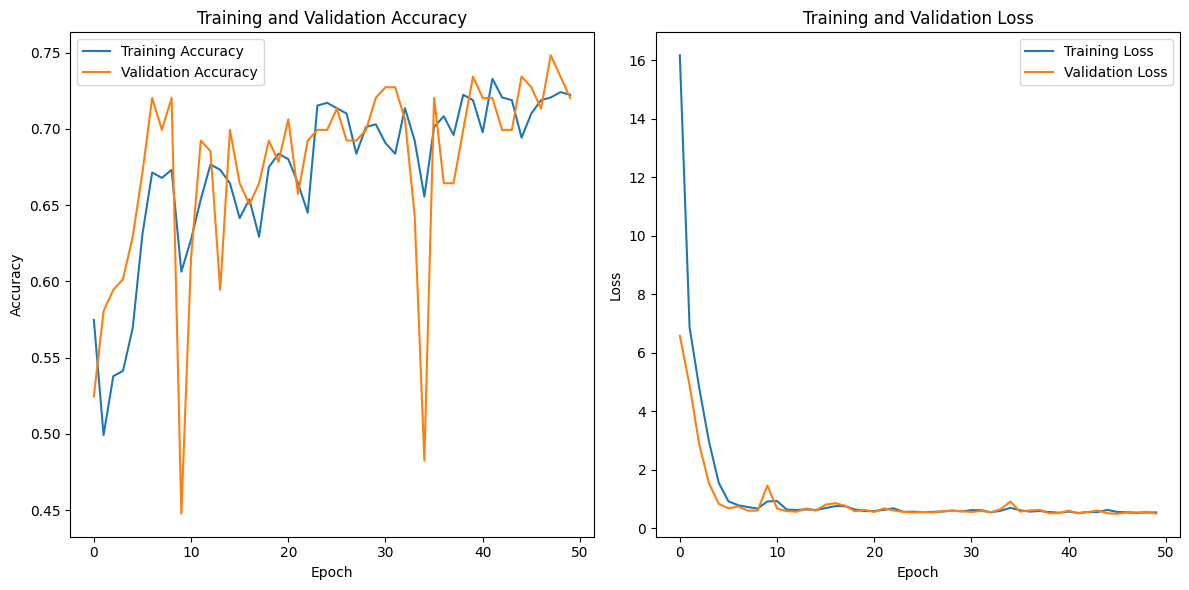

In [54]:
# Plotting the training history
plt.figure(figsize=(12, 6))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()


6/6 [==============================] - 0s 2ms/step


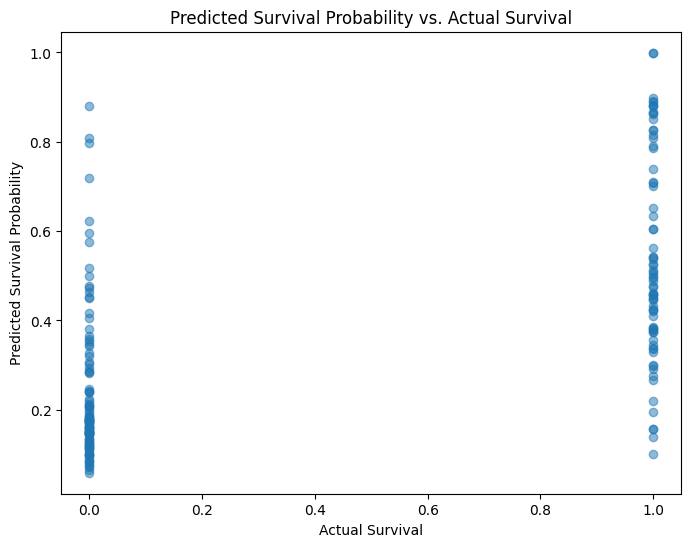

In [55]:
# Making predictions on all data
all_predictions = model.predict(X_test)

# Plotting the predicted probabilities
plt.figure(figsize=(8, 6))
plt.scatter(y_test, all_predictions, alpha=0.5)
plt.xlabel('Actual Survival')
plt.ylabel('Predicted Survival Probability')
plt.title('Predicted Survival Probability vs. Actual Survival')
plt.show()


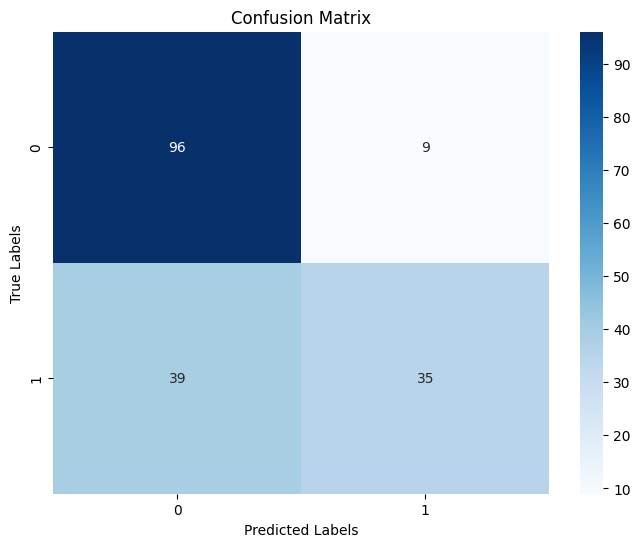

In [56]:
# Round of prediction
rounded_predictions = np.round(all_predictions).astype(int)

# Calculate confusion matrix
cm = confusion_matrix(y_test, rounded_predictions)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()